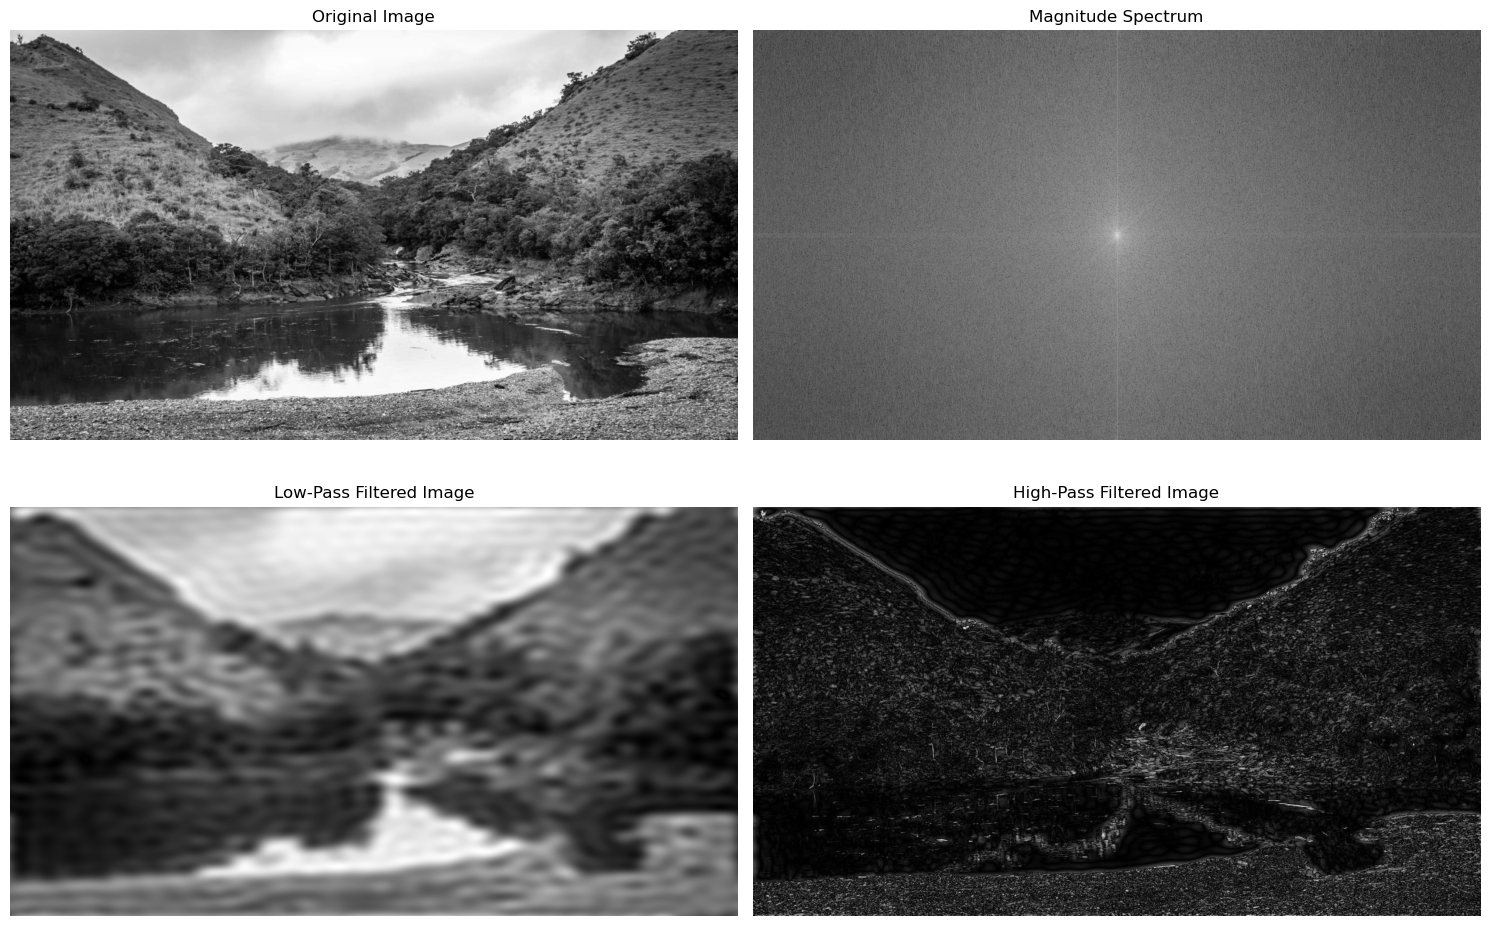

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform_and_filters(image_path):
    # Load grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Could not read image.")
        return

    # Apply Fourier Transform and shift zero frequency to center
    f_shift = np.fft.fftshift(np.fft.fft2(image))
    magnitude_spectrum = np.log(np.abs(f_shift) + 1)

    # Create Low-Pass Filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    radius = 30
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

    # Low-Pass Filtered Image
    low_pass = f_shift * mask
    low_image = np.abs(np.fft.ifft2(np.fft.ifftshift(low_pass)))

    # High-Pass Filtered Image
    high_pass = f_shift * (1 - mask)
    high_image = np.abs(np.fft.ifft2(np.fft.ifftshift(high_pass)))

    # Plot Results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Magnitude Spectrum')
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Low-Pass Filtered Image')
    plt.imshow(low_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('High-Pass Filtered Image')
    plt.imshow(high_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
fourier_transform_and_filters('sample-image.jpg')
